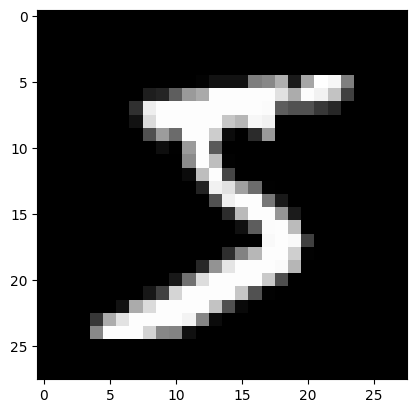

In [1]:
import pandas as pd
data_train=pd.read_csv('D:/mnist_train.csv')
#reshape
image=data_train.to_numpy().reshape(-1,28,28)
#show image
example=image[0]
from matplotlib import pyplot as plt
plt.imshow(example,cmap='gray')

In [74]:
data_train.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


- Normalisasi data, berguna agar dapat meningkatkan performa dari model neural network

In [2]:
normalize_train=image/255

- convert label data ke biner

In [3]:
from tensorflow.keras.utils import to_categorical
label_tr=pd.read_csv('D:/mnist_trainLab.csv')
Categorical=to_categorical(label_tr['label'],num_classes=10)
Categorical

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

- Building cnn model

In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models
#model cnn using sequeintial
model=models.Sequential()
#DEFining the input
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
#pengurangan dimensi tanpa menghilangkan informasi yang penting 2x2 digunakan umum pada CNN
model.add(layers.MaxPooling2D(2,2))
#layer 2, kenapa 64 agar kita dapat menangkap feature lebih detail lagi
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))
#flatten berfungsi tranform shape ke 1 dimensi yang hanya bekerja pada nn.
model.add(layers.Flatten())
#membuat intermediate layer agar prediksi meningkat dengan akurat,
#neuron yang dipakai untuk problem mnis 64/128
model.add(layers.Dense(128,activation='relu'))
#membuat output layer, fungsi aktifasi menggunakan softmax karena problemnya mulitclass classification
model.add(layers.Dense(10,activation='softmax'))
#compile the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

D:\anaconda\envs\tensor\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


- Training the model dengan data 

In [5]:
history=model.fit(normalize_train,Categorical,epochs=7,batch_size=128,validation_split=0.2)

Epoch 1/7
375/375 ━━━━━━━━━━━━━━━━━━━━ 19s 41ms/step - accuracy: 0.8382 - loss: 0.5622 - val_accuracy: 0.9805 - val_loss: 0.0676
Epoch 2/7
375/375 ━━━━━━━━━━━━━━━━━━━━ 17s 46ms/step - accuracy: 0.9793 - loss: 0.0692 - val_accuracy: 0.9842 - val_loss: 0.0522
Epoch 3/7
375/375 ━━━━━━━━━━━━━━━━━━━━ 16s 43ms/step - accuracy: 0.9868 - loss: 0.0415 - val_accuracy: 0.9876 - val_loss: 0.0435
Epoch 4/7
375/375 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - accuracy: 0.9897 - loss: 0.0333 - val_accuracy: 0.9866 - val_loss: 0.0495
Epoch 5/7
375/375 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.9922 - loss: 0.0256 - val_accuracy: 0.9884 - val_loss: 0.0389
Epoch 6/7
375/375 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.9939 - loss: 0.0190 - val_accuracy: 0.9906 - val_loss: 0.0337
Epoch 7/7
375/375 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - accuracy: 0.9952 - loss: 0.0145 - val_accuracy: 0.9919 - val_loss: 0.0341


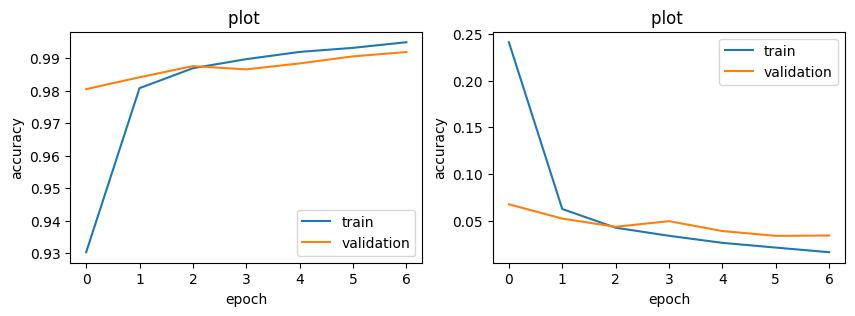

In [6]:
#membuat plot learning curve
from matplotlib import pyplot as plt
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(10,3))
for i,j in zip(range(2),[['accuracy','val_accuracy'],['loss','val_loss']]):
    train=j[0]
    val=j[1]
    ax[i].plot(history.history[train],label='train')
    ax[i].plot(history.history[val],label='validation')
    ax[i].set_xlabel('epoch')
    ax[i].set_ylabel('accuracy')
    ax[i].set_title('plot ')
    ax[i].legend()

    Dari gambar diatas, model mengalami overfitting karena model dapat bekerja baik pada training data dibandingkan dengan validation data

**Percobaan**

In [10]:
import sklearn

1. Cross validation

In [83]:
from sklearn.model_selection import KFold
#banyaknya fold
kf=KFold(n_splits=5,shuffle=True,random_state=42)
result=[]
for train_id,val_id in (kf.split(normalize_train)):
    x_train,x_val=normalize_train[train_id],normalize_train[val_id]
    y_train,y_val=Categorical[train_id],Categorical[val_id]
    history_1=model.fit(x_train,y_train,batch_size=128,epochs=7,validation_data=(x_val,y_val))
    result.append(history_1)

Epoch 1/7
375/375 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.9990 - loss: 0.0032 - val_accuracy: 0.9998 - val_loss: 0.0012
Epoch 2/7
375/375 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - accuracy: 0.9994 - loss: 0.0021 - val_accuracy: 0.9988 - val_loss: 0.0042
Epoch 3/7
375/375 ━━━━━━━━━━━━━━━━━━━━ 15s 41ms/step - accuracy: 0.9998 - loss: 7.3046e-04 - val_accuracy: 0.9995 - val_loss: 0.0014
Epoch 4/7
375/375 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.9996 - loss: 0.0015 - val_accuracy: 0.9995 - val_loss: 0.0016
Epoch 5/7
375/375 ━━━━━━━━━━━━━━━━━━━━ 14s 37ms/step - accuracy: 1.0000 - loss: 3.1965e-04 - val_accuracy: 0.9998 - val_loss: 4.5836e-04
Epoch 6/7
375/375 ━━━━━━━━━━━━━━━━━━━━ 14s 37ms/step - accuracy: 1.0000 - loss: 3.0503e-05 - val_accuracy: 0.9999 - val_loss: 2.8888e-04
Epoch 7/7
375/375 ━━━━━━━━━━━━━━━━━━━━ 15s 40ms/step - accuracy: 1.0000 - loss: 9.3319e-06 - val_accuracy: 1.0000 - val_loss: 2.4511e-04
Epoch 1/7
375/375 ━━━━━━━━━━━━━━━━━━━━ 15s 41ms/step - accuracy: 0.99

Text(0, 0.5, 'Accuracy')

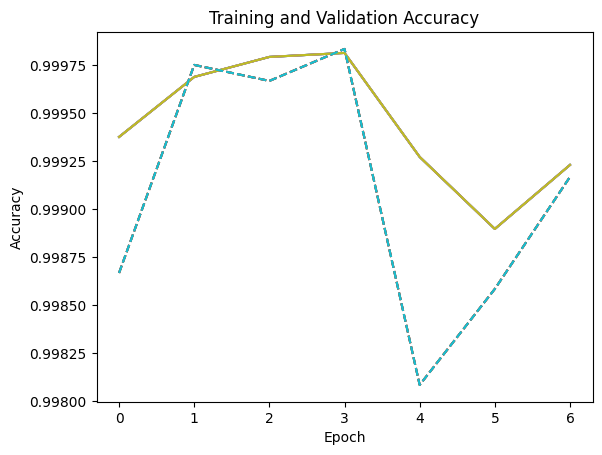

In [21]:
for i, history in enumerate(result):
    plt.plot(history_1.history['accuracy'], label='train')
    plt.plot(history_1.history['val_accuracy'], label='val',linestyle='--')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')


     Dari gambar diatas, model masih mengalami overfitting karena validation (blue dashed line) masih di bawah training accuracy

2. Regularization L2

In [23]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers


In [27]:
#model cnn using sequeintial
model_l=models.Sequential()
#DEFining the input
model_l.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1),kernel_regularizer=regularizers.l2(0.01)))
#pengurangan dimensi tanpa menghilangkan informasi yang penting 2x2 digunakan umum pada CNN
model_l.add(layers.MaxPooling2D(2,2))
#layer 2, kenapa 64 agar kita dapat menangkap feature lebih detail lagi
model_l.add(layers.Conv2D(64,(3,3),activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model_l.add(layers.MaxPooling2D(2,2))
#flatten berfungsi tranform shape ke 1 dimensi yang hanya bekerja pada nn.
model_l.add(layers.Flatten())
#membuat intermediate layer agar prediksi meningkat dengan akurat,
#neuron yang dipakai untuk problem mnis 64/128
model_l.add(layers.Dense(128,activation='relu',kernel_regularizer=regularizers.l2(0.01)))
#membuat output layer, fungsi aktifasi menggunakan softmax karena problemnya mulitclass classification
model_l.add(layers.Dense(10,activation='softmax'))
#compile the model
model_l.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [28]:
history_l=model_l.fit(normalize_train,Categorical,epochs=7,batch_size=128,validation_split=0.2)

Epoch 1/7
375/375 ━━━━━━━━━━━━━━━━━━━━ 18s 41ms/step - accuracy: 0.8148 - loss: 1.6069 - val_accuracy: 0.9499 - val_loss: 0.4059
Epoch 2/7
375/375 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - accuracy: 0.9542 - loss: 0.3680 - val_accuracy: 0.9624 - val_loss: 0.3105
Epoch 3/7
375/375 ━━━━━━━━━━━━━━━━━━━━ 14s 37ms/step - accuracy: 0.9616 - loss: 0.3171 - val_accuracy: 0.9658 - val_loss: 0.2871
Epoch 4/7
375/375 ━━━━━━━━━━━━━━━━━━━━ 15s 41ms/step - accuracy: 0.9609 - loss: 0.3071 - val_accuracy: 0.9589 - val_loss: 0.3019
Epoch 5/7
375/375 ━━━━━━━━━━━━━━━━━━━━ 14s 38ms/step - accuracy: 0.9637 - loss: 0.2863 - val_accuracy: 0.9594 - val_loss: 0.2906
Epoch 6/7
375/375 ━━━━━━━━━━━━━━━━━━━━ 14s 37ms/step - accuracy: 0.9646 - loss: 0.2754 - val_accuracy: 0.9735 - val_loss: 0.2508
Epoch 7/7
375/375 ━━━━━━━━━━━━━━━━━━━━ 14s 38ms/step - accuracy: 0.9672 - loss: 0.2599 - val_accuracy: 0.9632 - val_loss: 0.2711


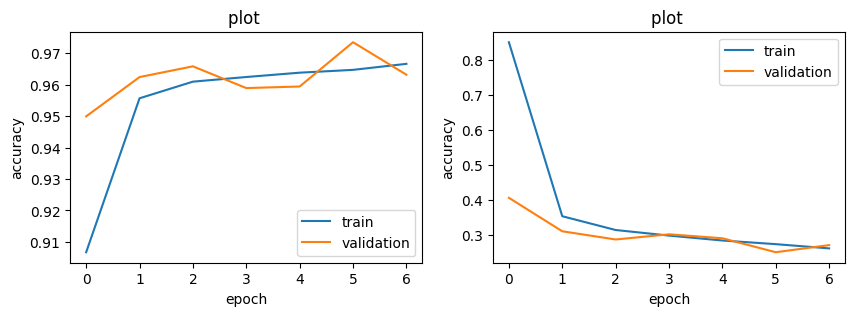

In [29]:
#membuat plot learning curve
from matplotlib import pyplot as plt
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(10,3))
for i,j in zip(range(2),[['accuracy','val_accuracy'],['loss','val_loss']]):
    train=j[0]
    val=j[1]
    ax[i].plot(history_l.history[train],label='train')
    ax[i].plot(history_l.history[val],label='validation')
    ax[i].set_xlabel('epoch')
    ax[i].set_ylabel('accuracy')
    ax[i].set_title('plot ')
    ax[i].legend()

    dari gambar di atas tidak mengindikasikan terjadinya overfitting karena baik training dan validation memiliki akurasi yang tinggi 

- evaluate model dengan test dataset

In [81]:
import pandas as pd
data_test=pd.read_csv('D:/mnist_test_new.csv')
#reshape
image_test=data_test.to_numpy().reshape(10000,28,28).astype('float32')
normalize_test=image_test/255

In [77]:
data_test.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
label_ts=pd.read_csv('D:/mnist_testLab.csv')
Categorical_ts=to_categorical(label_ts['label'],num_classes=10)
Categorical_ts

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [79]:
len(image_test)

10000

In [82]:
#perform model
test_loss,test_accuracy=model_l.evaluate(normalize_test,Categorical_ts)


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9554 - loss: 0.2821


    dari hasil di atas didapat nilai akurasi sebesar 0.9554 atau 95% untuk menguji pada test dataset. artinya model ini bekerja baik pada test dataset